In [86]:
## need to do: some null value can be replaced with mean, some population can be obtained from internet,do not need
## to delete all with null value, need to do it later if have time.
## normalized data
## visualize data: country etc.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
lifeExpec = pd.read_csv('LifeExpectancyData.csv')

In [3]:
lifeExpec.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
lifeExpec.shape

(2938, 22)

In [5]:
lifeExpec.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [6]:
lifeExpec.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [7]:
lifeExpec.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [8]:
## replace developed country to 1,developing country to 2
##lifeExpec['Status'].replace({'Developing': 2,'Developed': 1 }, inplace = True)

In [9]:
country_list = lifeExpec.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [10]:
for country in country_list:
    lifeExpec.loc[lifeExpec['Country'] == country,fill_list] = lifeExpec.loc[lifeExpec['Country'] == country,fill_list].interpolate()

In [11]:
# Drop remaining null values after interpolation.
lifeExpec.dropna(inplace=True)
lifeExpec.shape

(1987, 22)

In [12]:
countryNames = lifeExpec.Country.unique()
countryNames.size

133

In [13]:
lifeExpec.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000


In [14]:
round(lifeExpec[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [15]:
l =(round(lifeExpec.groupby('Status')['Life_Expectancy'].mean(), 2).to_numpy())


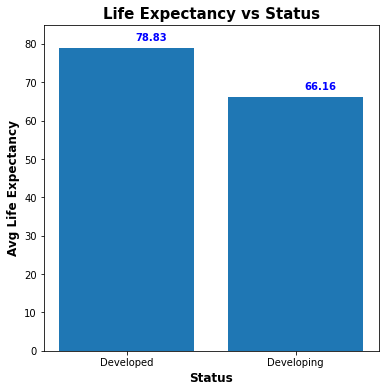

In [16]:
## life Expectancy vs status 
l =(round(lifeExpec.groupby('Status')['Life_Expectancy'].mean(), 2).to_numpy())
plt.figure(figsize=(6,6))
plt.bar(lifeExpec.groupby('Status')['Status'].count().index,lifeExpec.groupby('Status')['Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12,fontweight='bold')
plt.ylabel("Avg Life Expectancy",fontsize=12,fontweight='bold')
plt.ylim(0, 85)
plt.title("Life Expectancy vs Status", fontsize=15,fontweight='bold')
for i, v in enumerate(l):
    plt.text(i +0.05,v +2,str(v), color='blue', fontweight='bold' )
plt.show()

In [17]:
import scipy.stats as stats
stats.ttest_ind(lifeExpec.loc[lifeExpec['Status']=='Developed','Life_Expectancy'],lifeExpec.loc[lifeExpec['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

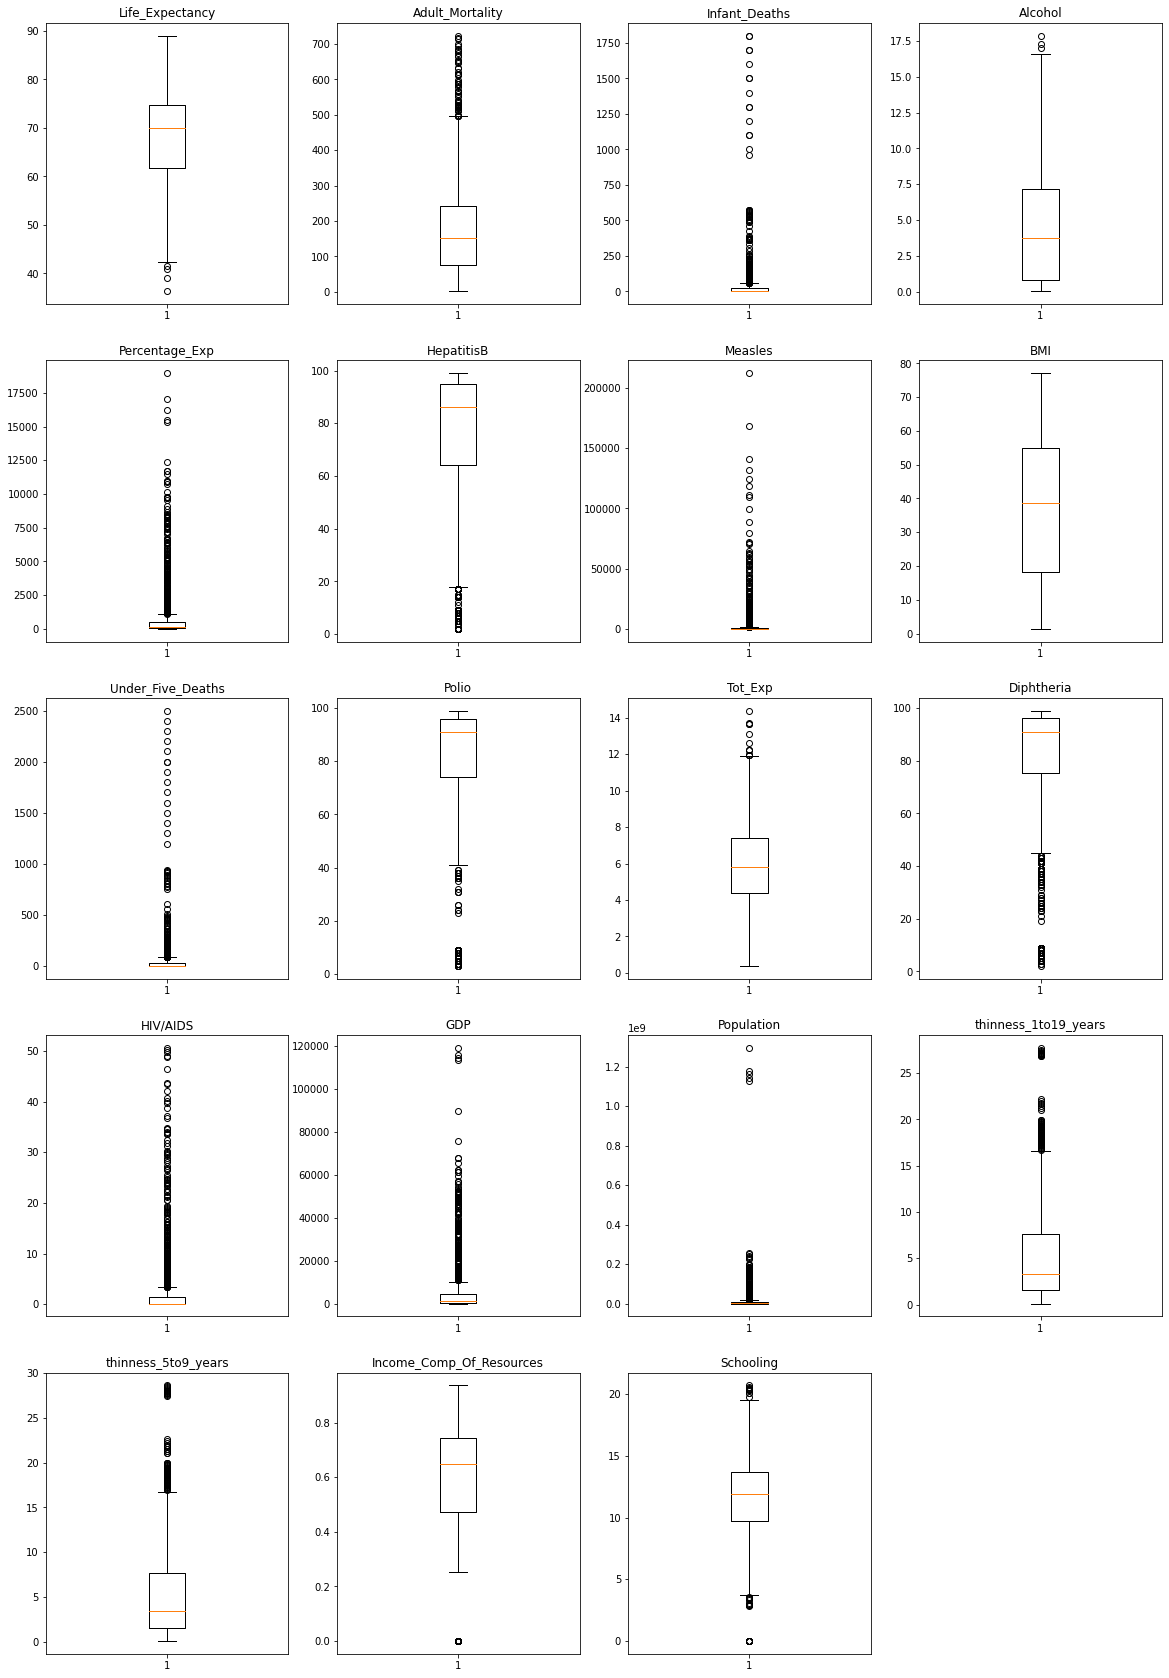

In [18]:
## detect outliers using boxplot
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,
            'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(lifeExpec[variable],whis=1.5)
                     plt.title(variable)

plt.show()

The boxplot results shows there are outliers exist in each variables. Next, we will take a look at each indivual variable, to see if we need to normalize the variables.

In [19]:
## check life Expecancy
lifeExpec[lifeExpec["Life_Expectancy"] < 45]


,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,68.0,0,...,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,87.0,0,...,88.0,6.30,89.0,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7
1485,Lesotho,2004,Developing,44.8,666.0,5,1.80,67.913618,6.0,31,...,89.0,6.96,9.0,34.6,781.514594,1933728.0,9.7,9.7,0.439,10.7
1582,Malawi,2003,Developing,44.6,613.0,43,1.08,4.375316,84.0,167,...,85.0,6.35,84.0,24.2,26.152517,12336687.0,7.6,7.5,0.362,10.3
1583,Malawi,2002,Developing,44.0,67.0,46,1.10,3.885395,64.0,92,...,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1584,Malawi,2001,Developing,43.5,599.0,48,1.15,12.797606,64.0,150,...,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
1585,Malawi,2000,Developing,43.1,588.0,51,1.18,13.762702,64.0,304,...,73.0,6.70,75.0,25.5,153.259487,11376172.0,8.0,7.9,0.391,10.7
2306,Sierra Leone,2006,Developing,44.3,464.0,30,3.80,38.000758,63.0,33,...,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
2307,Sierra Leone,2005,Developing,43.3,48.0,30,3.83,42.088929,63.0,29,...,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8
2308,Sierra Leone,2004,Developing,42.3,496.0,30,3.99,38.524548,63.0,7,...,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6


In [20]:
lifeExpec[lifeExpec["Country"] == 'Sierra Leone']['Life_Expectancy']

2298    48.1
2299    54.0
2300    49.7
2301    48.9
2302    48.1
2303    47.1
2304    46.2
2305    45.3
2306    44.3
2307    43.3
2308    42.3
2309    41.5
2310    48.0
2311    41.0
2312    39.0
Name: Life_Expectancy, dtype: float64

In [21]:
lifeExpec[lifeExpec["Country"] == 'Malawi']['Life_Expectancy']

1571    57.6
1572    56.7
1573    55.3
1574    54.1
1575    52.9
1576    51.5
1577    50.0
1578    48.5
1579    47.1
1580    46.0
1581    45.1
1582    44.6
1583    44.0
1584    43.5
1585    43.1
Name: Life_Expectancy, dtype: float64

In [22]:
lifeExpec[lifeExpec["Country"] == 'Lesotho']['Life_Expectancy']

1475    52.1
1476    52.1
1477    52.2
1478    52.3
1479    51.1
1480    49.4
1481    47.8
1482    46.2
1483    45.3
1484    44.5
1485    44.8
1486    45.5
1487    46.4
1488    47.8
1489    49.3
Name: Life_Expectancy, dtype: float64

In [23]:
lifeExpec[lifeExpec["Country"] == 'Zambia']['Life_Expectancy']

2907    61.1
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
Name: Life_Expectancy, dtype: float64

In [24]:
lifeExpec[lifeExpec["Country"] == 'Zimbabwe']['Life_Expectancy']

2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, dtype: float64

Based on the analysis above, the life Expectancy low is mainly because these data are from developing country. Here we will keep the data. 

In [25]:
## check  Adult_Mortality
lifeExpec[lifeExpec["Adult_Mortality"] > 500]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
346,Botswana,2005,Developing,51.7,566.0,2,6.37,629.842564,92.0,5,...,96.0,5.62,96.0,20.6,5351.253732,1855852.0,1.0,9.9,0.593,11.9
347,Botswana,2004,Developing,48.1,652.0,2,4.90,469.582390,91.0,1,...,96.0,5.56,96.0,28.4,4896.583835,182933.0,1.5,1.4,0.580,11.8
348,Botswana,2003,Developing,46.4,693.0,2,5.51,299.367125,9.0,59,...,96.0,4.65,96.0,31.9,4163.659600,184339.0,1.9,1.8,0.567,11.8
349,Botswana,2002,Developing,46.0,699.0,2,6.41,6.330007,88.0,7,...,97.0,6.47,97.0,34.6,355.618382,1779953.0,11.4,11.3,0.558,11.9
350,Botswana,2001,Developing,46.7,679.0,2,5.48,306.952735,87.0,1,...,97.0,5.73,97.0,37.2,3128.977930,1754935.0,11.8,11.8,0.560,11.8
351,Botswana,2000,Developing,47.8,647.0,2,5.37,250.891648,86.0,2672,...,97.0,4.64,97.0,38.8,3349.688230,172834.0,12.3,12.2,0.559,11.7
522,Central African Republic,2005,Developing,45.9,511.0,17,1.50,40.922080,42.0,471,...,47.0,4.29,54.0,11.2,327.114946,412791.0,9.7,9.7,0.319,5.9
523,Central African Republic,2004,Developing,45.7,512.0,17,1.50,41.501117,42.0,1233,...,45.0,4.10,51.0,12.0,313.215980,45536.0,9.9,9.9,0.315,5.7
865,Eritrea,2000,Developing,45.3,593.0,7,0.83,0.735940,86.0,789,...,82.0,4.43,81.0,1.9,28.196949,339281.0,1.2,1.1,0.000,3.9
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,68.0,0,...,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6


The boxplot shows the data the mortality in some countries, such as Zimbabwe, Zambia, Lesotho, Botswana,Malawi are all high. That may be caused by some factors. We will do specific analysis on these countries to see if we can dig out some important information. Here, we mainly investigate Central African Republic, Eritrea,Haiti, Sierra Leone to see if the mortality is abnormal.

In [26]:
lifeExpec[lifeExpec["Country"] == 'Central African Republic']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
513,Central African Republic,2014,Developing,58.0,437.0,15,0.01,53.439643,47.0,210,...,47.0,4.20,47.0,4.5,377.132274,4515392.0,8.4,8.3,0.345,7.1
514,Central African Republic,2013,Developing,49.9,451.0,16,0.01,52.377666,23.0,596,...,23.0,3.82,23.0,5.1,337.484961,4499653.0,8.5,8.5,0.370,7.1
515,Central African Republic,2012,Developing,53.0,439.0,16,0.01,7.344808,47.0,141,...,47.0,3.62,47.0,5.1,486.411140,449416.0,8.7,8.6,0.366,7.1
516,Central African Republic,2011,Developing,49.8,443.0,16,1.66,58.529475,47.0,679,...,47.0,3.73,47.0,5.8,494.336779,4476153.0,8.8,8.8,0.361,6.8
517,Central African Republic,2010,Developing,49.2,446.0,17,1.67,43.483592,45.0,2,...,46.0,3.90,45.0,6.6,446.443449,4448525.0,9.0,8.9,0.352,6.6
518,Central African Republic,2009,Developing,48.6,453.0,17,1.56,40.451569,42.0,11,...,45.0,3.58,42.0,7.3,449.961839,44423.0,9.1,9.1,0.345,6.4
519,Central African Republic,2008,Developing,47.6,477.0,17,1.52,67.341375,42.0,12,...,46.0,4.30,45.0,8.3,456.861433,4345386.0,9.3,9.2,0.338,6.3
520,Central African Republic,2007,Developing,46.8,495.0,17,1.50,60.048848,42.0,49,...,46.0,4.40,48.0,9.0,397.148467,42758.0,9.4,9.4,0.330,6.2
521,Central African Republic,2006,Developing,46.3,56.0,17,1.54,46.901179,42.0,3,...,47.0,3.99,51.0,10.0,347.673678,421758.0,9.6,9.6,0.323,6.0
522,Central African Republic,2005,Developing,45.9,511.0,17,1.50,40.922080,42.0,471,...,47.0,4.29,54.0,11.2,327.114946,412791.0,9.7,9.7,0.319,5.9


Adult Mortality in Central African Republic looks very abnormal, the Adult Mortality between 2000 and 2003 are very low, arount 50, however, after 2004, it increased dramatically. Based on data from world bank, https://data.worldbank.org/indicator/SP.DYN.AMRT.MA?locations=CF, the Adult Mortality is always above 390. So the Adult Mortality in 2000, 2001, 2002, 2003 and 2006 are not correct. Here, the Adult Mortality of those years will be modified based on world bank data. 

In [27]:
## make a copy
lifeExpecCopy = lifeExpec

In [28]:
## 2000 
lifeExpec.loc[527,'Adult_Mortality'] = 540.27   
## 2001
lifeExpec.loc[526,'Adult_Mortality'] = 548.42
## 2002
lifeExpec.loc[525,'Adult_Mortality'] = 556.57
##2003
lifeExpec.loc[524,'Adult_Mortality'] = 548.02
## 2006
lifeExpec.loc[521,'Adult_Mortality'] = 522.39

In [29]:
lifeExpec[lifeExpec["Country"] == 'Eritrea']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
854,Eritrea,2011,Developing,62.9,286.0,6,0.62,20.979919,96.0,48,...,96.0,3.60,96.0,0.7,582.775532,447469.0,8.8,8.7,0.405,5.0
855,Eritrea,2010,Developing,62.1,298.0,6,0.61,17.357398,9.0,51,...,9.0,3.24,9.0,0.9,482.149940,43984.0,8.9,8.8,0.404,5.1
856,Eritrea,2009,Developing,61.4,311.0,6,0.63,1.575160,92.0,82,...,92.0,3.30,92.0,1.0,43.754450,431334.0,9.0,8.9,0.402,5.2
857,Eritrea,2008,Developing,67.0,322.0,6,0.49,11.765723,94.0,0,...,94.0,3.69,94.0,1.1,326.825642,4232636.0,9.1,9.1,0.406,5.2
858,Eritrea,2007,Developing,62.0,329.0,6,1.23,11.423860,91.0,55,...,91.0,3.29,91.0,1.3,317.329434,4153332.0,9.2,9.2,0.405,5.3
859,Eritrea,2006,Developing,59.7,336.0,7,0.97,10.602698,94.0,128,...,94.0,3.30,94.0,1.4,297.828588,466648.0,9.3,9.3,0.405,5.3
860,Eritrea,2005,Developing,59.4,34.0,7,1.07,5.064689,96.0,19,...,96.0,2.97,96.0,1.6,276.758960,39697.0,9.4,9.5,0.000,5.4
861,Eritrea,2004,Developing,59.1,342.0,7,0.64,10.260973,84.0,24,...,98.0,3.14,98.0,1.8,287.422224,3858623.0,9.6,9.6,0.000,5.0
862,Eritrea,2003,Developing,58.8,343.0,7,0.56,6.913998,91.0,376,...,95.0,3.50,93.0,1.9,232.794546,3738265.0,9.7,9.7,0.000,4.7
863,Eritrea,2002,Developing,58.5,343.0,7,0.83,0.703132,86.0,460,...,92.0,4.20,9.0,1.9,21.768798,3614639.0,9.9,9.9,0.000,4.4


The Adult_Mortality of Eritrea in 2005 is abnormal. Based on data from world bank, https://data.worldbank.org/indicator/SP.DYN.AMRT.MA, the Adult Mortality is 202.96. So we change the value of the Adult_Mortality of Eritrea in 2005 into 202.96.

In [30]:
##2005 Eritrea
lifeExpec.loc[860,'Adult_Mortality'] = 202.96

In [31]:
lifeExpec[lifeExpec["Country"] == 'Haiti']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
1123,Haiti,2014,Developing,63.1,245.0,14,0.01,5.103249,48.0,0,...,55.0,7.56,48.0,0.5,83.114812,1572466.0,3.9,3.9,0.487,9.1
1124,Haiti,2013,Developing,62.7,253.0,14,5.68,4.989712,68.0,0,...,67.0,8.10,68.0,0.5,81.265673,1431776.0,3.9,3.9,0.483,9.1
1125,Haiti,2012,Developing,62.3,259.0,15,5.68,26.379425,68.0,0,...,67.0,9.88,67.0,0.8,766.843762,128921.0,3.9,3.9,0.477,8.9
1126,Haiti,2011,Developing,62.3,259.0,15,5.68,4.106484,68.0,0,...,67.0,1.41,68.0,1.5,74.935845,114554.0,4.0,4.0,0.470,8.7
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,68.0,0,...,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1128,Haiti,2009,Developing,62.5,251.0,16,5.85,41.300795,68.0,0,...,65.0,6.68,65.0,2.0,668.297646,985287.0,4.1,4.1,0.466,8.5
1129,Haiti,2008,Developing,62.1,259.0,16,5.95,63.831957,68.0,0,...,64.0,5.92,63.0,2.4,674.756415,97529.0,4.2,4.2,0.462,8.4
1130,Haiti,2007,Developing,61.8,266.0,17,6.08,56.778587,68.0,0,...,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4
1131,Haiti,2006,Developing,61.1,28.0,17,6.18,6.995556,68.0,0,...,61.0,5.70,6.0,3.3,55.476260,949457.0,4.3,4.3,0.455,8.3
1132,Haiti,2005,Developing,65.0,29.0,17,5.57,38.109043,68.0,0,...,6.0,4.41,6.0,3.9,465.311876,926344.0,4.4,4.4,0.452,8.2


From above chart, we could see, the Adult_Mortality in Haiti in 2010,and from 2000 to 2006 are abnormal. Based on data from world bank, https://data.worldbank.org/indicator/SP.DYN.AMRT.MA?locations=HT, the Adult Mortality is decreasing, but the the Adult_Mortality is still above 250. So we need to modify the data based on world bank.

In [32]:
## 2000 
lifeExpec.loc[1137,'Adult_Mortality'] = 337.64  
## 2001
lifeExpec.loc[1136,'Adult_Mortality'] = 336.45
## 2002
lifeExpec.loc[1135,'Adult_Mortality'] = 335.25
##2003
lifeExpec.loc[1134,'Adult_Mortality'] = 329.85
## 2004
lifeExpec.loc[1133,'Adult_Mortality'] = 324.45
##2005
lifeExpec.loc[1132,'Adult_Mortality'] = 319.05
## 2006
lifeExpec.loc[1131,'Adult_Mortality'] = 313.65
## 2010
lifeExpec.loc[1127,'Adult_Mortality'] = 293.38

In [33]:
lifeExpec[lifeExpec["Country"] == 'Sierra Leone']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
2298,Sierra Leone,2014,Developing,48.1,463.0,23,0.01,1.443286,83.0,1006,...,83.0,11.90,83.0,0.6,78.439476,779162.0,7.5,7.4,0.426,9.5
2299,Sierra Leone,2013,Developing,54.0,47.0,23,0.01,1.321464,92.0,15,...,92.0,11.59,92.0,0.8,71.818700,692279.0,7.7,7.6,0.413,9.3
2300,Sierra Leone,2012,Developing,49.7,411.0,25,0.01,54.560337,91.0,678,...,91.0,11.24,91.0,0.9,561.898424,676613.0,7.9,7.8,0.401,9.1
2301,Sierra Leone,2011,Developing,48.9,418.0,26,3.78,54.665918,89.0,1865,...,88.0,11.98,89.0,1.3,445.525000,6611692.0,8.1,8.0,0.392,8.9
2302,Sierra Leone,2010,Developing,48.1,424.0,27,3.84,5.347718,86.0,1089,...,84.0,1.32,86.0,1.6,45.128418,645872.0,8.3,8.2,0.384,8.7
2303,Sierra Leone,2009,Developing,47.1,433.0,28,3.97,49.837127,84.0,31,...,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5
2304,Sierra Leone,2008,Developing,46.2,441.0,29,3.91,5.379606,77.0,44,...,75.0,1.29,77.0,1.9,46.375918,6165372.0,8.7,8.7,0.367,8.3
2305,Sierra Leone,2007,Developing,45.3,45.0,29,3.86,45.571089,63.0,0,...,63.0,1.12,64.0,2.2,358.827472,615417.0,8.9,8.9,0.357,8.2
2306,Sierra Leone,2006,Developing,44.3,464.0,30,3.80,38.000758,63.0,33,...,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
2307,Sierra Leone,2005,Developing,43.3,48.0,30,3.83,42.088929,63.0,29,...,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8


From above chart, we could see, the Adult_Mortality in Sierra Leone in 2003, 2005, 2007, 2013 are abnormal. Based on data from world bank, https://data.worldbank.org/indicator/SP.DYN.AMRT.MA, the Adult_Mortality is still above 400. So we need to modify the data based on world bank.

In [34]:
## modify the Adult_Mortality in Sierra Leone
## 2003
lifeExpec.loc[2309,'Adult_Mortality'] = 511.26
## 2005
lifeExpec.loc[2307,'Adult_Mortality'] = 483.17
## 2007
lifeExpec.loc[2305,'Adult_Mortality'] = 455.08
##2013
lifeExpec.loc[2299,'Adult_Mortality'] = 409.65


In [35]:
lifeExpec[lifeExpec["Country"] == 'Sierra Leone']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
2298,Sierra Leone,2014,Developing,48.1,463.00,23,0.01,1.443286,83.0,1006,...,83.0,11.90,83.0,0.6,78.439476,779162.0,7.5,7.4,0.426,9.5
2299,Sierra Leone,2013,Developing,54.0,409.65,23,0.01,1.321464,92.0,15,...,92.0,11.59,92.0,0.8,71.818700,692279.0,7.7,7.6,0.413,9.3
2300,Sierra Leone,2012,Developing,49.7,411.00,25,0.01,54.560337,91.0,678,...,91.0,11.24,91.0,0.9,561.898424,676613.0,7.9,7.8,0.401,9.1
2301,Sierra Leone,2011,Developing,48.9,418.00,26,3.78,54.665918,89.0,1865,...,88.0,11.98,89.0,1.3,445.525000,6611692.0,8.1,8.0,0.392,8.9
2302,Sierra Leone,2010,Developing,48.1,424.00,27,3.84,5.347718,86.0,1089,...,84.0,1.32,86.0,1.6,45.128418,645872.0,8.3,8.2,0.384,8.7
2303,Sierra Leone,2009,Developing,47.1,433.00,28,3.97,49.837127,84.0,31,...,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5
2304,Sierra Leone,2008,Developing,46.2,441.00,29,3.91,5.379606,77.0,44,...,75.0,1.29,77.0,1.9,46.375918,6165372.0,8.7,8.7,0.367,8.3
2305,Sierra Leone,2007,Developing,45.3,455.08,29,3.86,45.571089,63.0,0,...,63.0,1.12,64.0,2.2,358.827472,615417.0,8.9,8.9,0.357,8.2
2306,Sierra Leone,2006,Developing,44.3,464.00,30,3.80,38.000758,63.0,33,...,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
2307,Sierra Leone,2005,Developing,43.3,483.17,30,3.83,42.088929,63.0,29,...,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8


Infant death are the number of Infant Deaths per 1000 population. Based on the boxplot, we can see there is some value greater than 1000. These values must be not correct. The details shows below.

In [36]:
lifeExpec[lifeExpec["Infant_Deaths"] > 750]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4


The above shows that the infant death in India is greater than 1000. Based on data from world bank, https://data.worldbank.org/indicator/SP.DYN.IMRT.IN?locations=IN, the Adult_Mortality is below 400. So, we need to modify the infant death rate in India.

In [37]:
## 2000
lifeExpec.loc[1201,'Infant_Deaths'] = 66.7
## 2001
lifeExpec.loc[1200,'Infant_Deaths'] = 64.4
## 2002
lifeExpec.loc[1199,'Infant_Deaths'] = 62.2
##2003
lifeExpec.loc[1198,'Infant_Deaths'] = 60
## 2004
lifeExpec.loc[1197,'Infant_Deaths'] = 57.8
## 2005
lifeExpec.loc[1196,'Infant_Deaths'] = 55.7
## 2006
lifeExpec.loc[1195,'Infant_Deaths'] = 53.7
##2007
lifeExpec.loc[1194,'Infant_Deaths'] = 51.6
## 2008
lifeExpec.loc[1193,'Infant_Deaths'] = 49.4
## 2009
lifeExpec.loc[1192,'Infant_Deaths'] = 47.3
## 2010
lifeExpec.loc[1191,'Infant_Deaths'] = 45.1
##2011
lifeExpec.loc[1190,'Infant_Deaths'] = 43
##2012
lifeExpec.loc[1189,'Infant_Deaths'] = 40.9
## 2013
lifeExpec.loc[1188,'Infant_Deaths'] = 38.8
## 2014
lifeExpec.loc[1187,'Infant_Deaths'] = 36.9

In [38]:
lifeExpec[lifeExpec["Alcohol"] > 16]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
227,Belarus,2012,Developing,71.9,194.0,0.0,16.35,91.709621,97.0,10,...,98.0,5.10,98.0,0.1,694.243915,9464495.0,2.0,2.1,0.793,15.6
228,Belarus,2011,Developing,72.0,232.0,0.0,17.31,846.911307,98.0,50,...,98.0,4.92,98.0,0.1,6519.717530,9473172.0,2.0,2.1,0.787,15.5
873,Estonia,2008,Developing,74.2,167.0,0.0,16.99,225.072362,94.0,0,...,95.0,6.60,95.0,0.1,1894.548500,13379.0,2.0,2.1,0.835,16.1
874,Estonia,2007,Developing,73.0,189.0,0.0,17.87,1904.124690,95.0,1,...,95.0,5.16,95.0,0.1,16586.452000,13468.0,2.0,2.1,0.829,16.1
875,Estonia,2006,Developing,73.0,188.0,0.0,16.58,244.351080,95.0,27,...,95.0,5.10,95.0,0.1,12595.416500,134681.0,2.1,2.2,0.822,16.1


It seems that there is only two countries whose alcohol values is higher,so a investigatation will be done below.

In [39]:
lifeExpec[lifeExpec["Country"] == 'Belarus']["Alcohol"]

225    13.94
226    14.66
227    16.35
228    17.31
229    14.44
230    14.09
231    14.67
232    14.22
233    12.60
234    11.01
235    12.05
236    11.17
237    12.23
238    10.74
239    12.98
Name: Alcohol, dtype: float64

The data from above seems normal, so nothing will be done on this data.

In [40]:
lifeExpec[lifeExpec["Country"] == 'Estonia']["Alcohol"]

867     0.01
868     0.01
869     0.01
870     0.01
871    14.97
872    15.04
873    16.99
874    17.87
875    16.58
876    15.52
877    15.07
878    11.64
879    11.48
880     0.01
881     0.01
Name: Alcohol, dtype: float64

The data here looks a ittle bit sketptical, but without concrete reason, no further step is taken at this moment.

The lifeExpec data looks skeptical based on the boxplot and analysis below. As discribe on the website, Expenditure on health as a percentage of Gross
Domestic Product per capita(%). For now, just keep the data here, further investigation will be done.

In [41]:
lifeExpec["Percentage_Exp"].max()

18961.3486

In [42]:
lifeExpec["Percentage_Exp"].min()

0.0

In [43]:
lifeExpec[lifeExpec["HepatitisB"] < 5].head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
461,Cabo Verde,2002,Developing,77.0,148.0,0.0,3.82,155.207267,4.0,0,...,92.0,5.17,91.0,0.8,1373.515636,45216.0,9.2,9.1,0.569,11.3
462,Cabo Verde,2001,Developing,73.0,152.0,0.0,3.81,150.743486,4.0,0,...,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
463,Cabo Verde,2000,Developing,69.9,155.0,0.0,3.49,122.574470,4.0,2,...,9.0,4.81,9.0,0.8,1239.377855,43579.0,9.6,9.5,0.000,11.3
531,Chad,2012,Developing,51.8,367.0,46.0,0.62,57.824271,4.0,120,...,51.0,3.00,4.0,3.6,973.472574,1275135.0,9.0,8.9,0.381,7.3
835,Equatorial Guinea,2014,Developing,57.9,32.0,3.0,0.01,13.404774,2.0,13,...,24.0,3.80,2.0,4.4,192.597330,1129424.0,8.5,8.4,0.582,9.2


HepatitisB: is Hepatitis B (HepB) immunization coverage among 1-year-olds, the HepatitisB rate lower than 5% are from developed country, so we will leave the data as original.

In [44]:
lifeExpec[lifeExpec["Measles"] > 30000]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
406,Burkina Faso,2009,Developing,56.9,283.0,44.0,4.55,81.143047,92.0,54118,...,91.0,7.41,92.0,1.1,552.745552,1.514199e+06,9.3,8.8,0.356,5.9
561,China,2014,Developing,75.8,86.0,171.0,5.78,109.874390,99.0,52628,...,99.0,5.55,99.0,0.1,7683.523800,1.364270e+05,3.7,3.0,0.723,13.1
565,China,2010,Developing,75.0,92.0,231.0,5.75,5.660755,99.0,38159,...,99.0,4.89,99.0,0.1,456.512487,1.337750e+05,4.2,3.6,0.691,12.5
566,China,2009,Developing,74.9,93.0,248.0,4.88,50.283489,99.0,52461,...,99.0,5.80,99.0,0.1,3838.434292,1.331260e+05,4.4,3.8,0.682,12.2
567,China,2008,Developing,74.5,97.0,266.0,4.27,39.225097,95.0,131441,...,99.0,4.59,97.0,0.1,3471.247547,1.324655e+06,4.5,4.0,0.672,11.9
568,China,2007,Developing,74.4,96.0,285.0,3.88,312.662482,92.0,109023,...,94.0,4.32,93.0,0.1,2695.366223,1.317885e+06,4.7,4.1,0.659,11.4
569,China,2006,Developing,74.2,98.0,307.0,3.28,29.743430,91.0,99602,...,94.0,4.52,93.0,0.1,299.229676,1.311200e+04,4.8,4.3,0.646,11.0
570,China,2005,Developing,73.9,99.0,332.0,2.92,171.659603,84.0,124219,...,87.0,4.66,87.0,0.1,1753.417800,1.337200e+04,5.0,4.4,0.634,10.6
571,China,2004,Developing,73.5,11.0,360.0,3.04,1.586685,79.0,70549,...,87.0,4.72,87.0,0.1,158.668462,1.296750e+05,5.1,4.6,0.622,10.2
572,China,2003,Developing,73.1,13.0,391.0,2.96,122.936535,75.0,71879,...,87.0,4.82,86.0,0.1,1288.642924,1.288400e+04,5.3,4.7,0.610,9.9


In [45]:
lifeExpec["Measles"].max()

212183

As the more Measles cases are in developing country, without further evidence that Measles is not correct, we will keep the data as original. 

In the beggining, we analyze whether developed country or developing country, it make different with the Life_Expectancy. Next we will analyze other factors that could affect the life expendency. Let's see the heat map.

Text(0.5, 1.0, 'Heat Map')

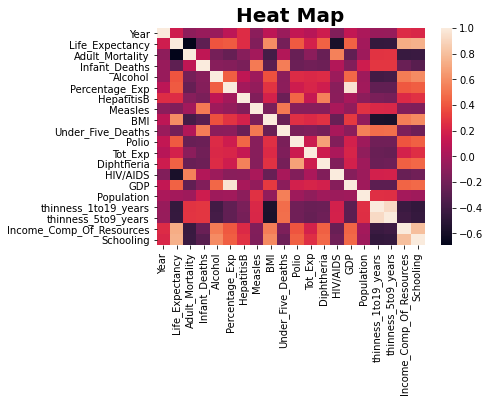

In [46]:
corr = lifeExpec.corr()
ax = plt.axes()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
ax.set_title("Heat Map",fontsize = 20,fontweight='bold')

From the heat map above, we could see life Expectancy has negative correlation with Adult_Mortality, Infant_Deaths, Measles, HIV/AIDS, under-five-year death, thinness 1-19 years, thinness 5-9 years. Life Expectancy has positive correlation with alcohol, percentage_Exp, BMI,Diphtheria,GDP,income_comp_Of_Resource, and Schoolng.
For poio, population, the correlation is so small, we could not say it's negative or positive. It worth to mention that life expectancy has high correlation with adult_mortality, BMI, Diphtheria, HIV/AIDS,thinness_1-19_years, thiness_5_to_9_years, income_of_resource and schooling. Further analysis is needed to gain more information.


Next we will investigate factors one by one, to see which factor will affect life expectancy and how it will affect. To dive more, the factors will be divided into immunization factors, mortality factors, economic factors, social factors and other health related factors. 

### mortality factor

In [47]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Adult_Mortality'])

-0.6926002671705571

Text(0.5, 1.0, 'Life Expectancy vs Adult Mortality')

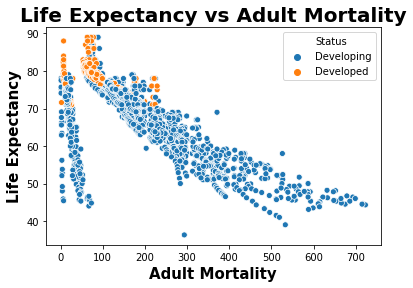

In [121]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Adult_Mortality'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Adult Mortality', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Adult Mortality",  fontsize = 20,fontweight='bold')

Above, the pearson correlation is used to test the correlation between Life Expectancy and Adult Mortality. The correlation is **-0.6926**. That means, the higher the mortality in a country, the shorter life expectancy. This applies to both developed countries and developing countries.

In [49]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Infant_Deaths'])

-0.28161534403121924

Text(0.5, 1.0, 'Life Expectancy vs Infant Death')

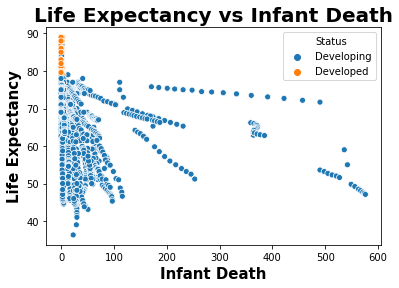

In [120]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Infant_Deaths'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Infant Death', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Infant Death",  fontsize = 20,fontweight='bold')

From above analysis, the correlation between life Expectancy and Infant Death is relatively low, -0.2816. That means, the higher life expectancy, the relatively lower infant death rate. But the correlation is low. There is an interesting phenomenia observed from correlation graph. For developed country, there is almost no relationship between life expectancy and infant death. Only for developing country the infant death may have low relationship with life expectancy. Further analysis are done below.

In [51]:
## divide country into developed and developing counties
lifeExpecDevelping = lifeExpec[lifeExpec["Status"] == "Developing"]
lifeExpecDevelped = lifeExpec[lifeExpec["Status"] == "Developed"]
lifeExpecDevelping.shape

(1702, 22)

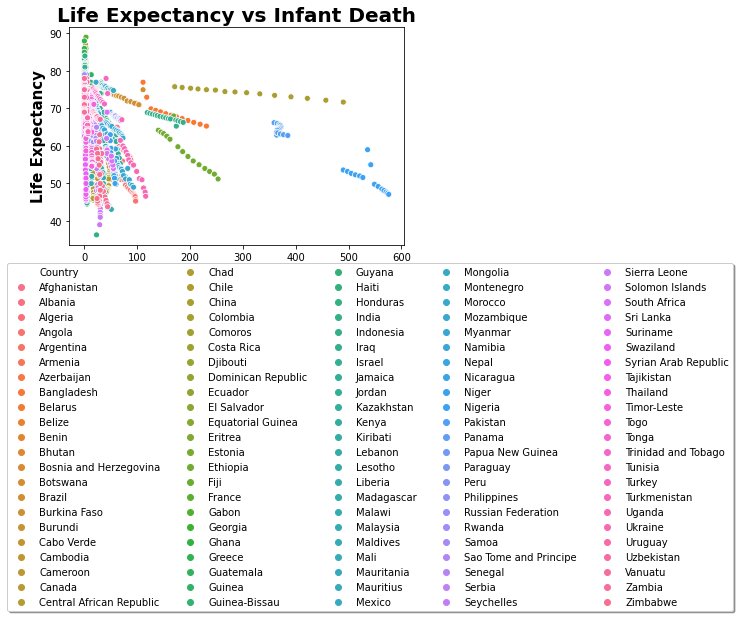

In [119]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Infant_Deaths'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Infant Death', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Infant Death",  fontsize = 20,fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

Indeed, some countries, the life expectancy has high correlation with infant death. For these country, lower the infant death could be one factor increase the whole country life expectancy.

In [53]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Under_Five_Deaths'])

-0.18743796595620021

Text(0.5, 1.0, 'Life Expectancy vs Under_Five_Deaths')

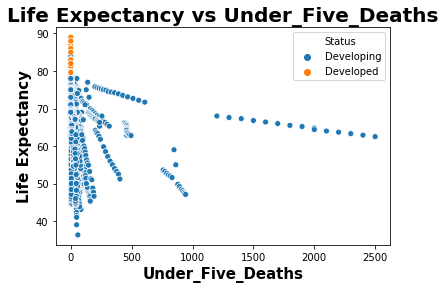

In [118]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Under_Five_Deaths'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Under_Five_Deaths', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Under_Five_Deaths",  fontsize = 20,fontweight='bold')

There is very low relationship with life expectancy and under five death. For developed countries, there is no correlation between life expectancy and under five death.

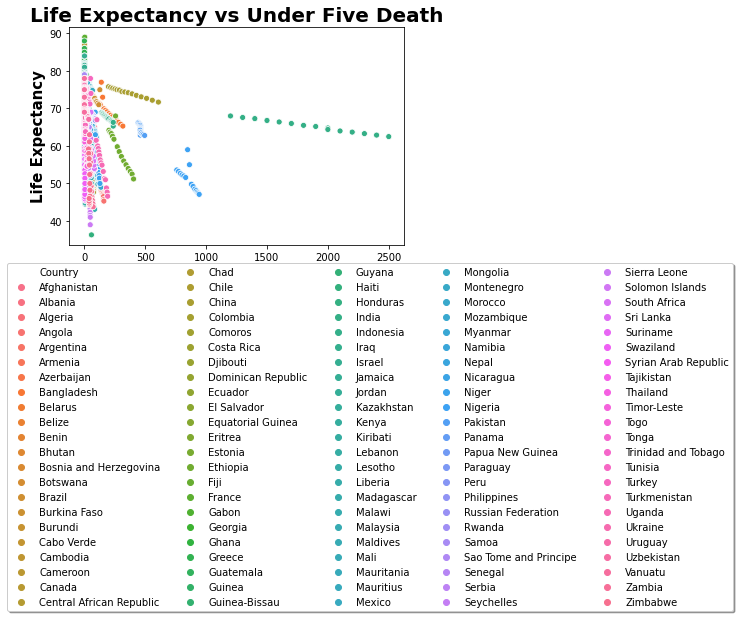

In [117]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Under_Five_Deaths'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Under Five Death', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Under Five Death",  fontsize = 20,fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

Only for a few counties, life expectancy and under five death have higher correlations. For these countries, lower the under five death could improve the life expectancy. We can do further analysis on these countries.

### Immunization Factors

In [56]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['HepatitisB'])

0.2496250530777189

Text(0.5, 1.0, 'Life Expectancy vs HepatitisB')

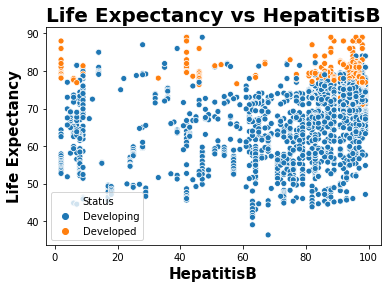

In [116]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['HepatitisB'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('HepatitisB', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs HepatitisB",  fontsize = 20,fontweight='bold')

In [58]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['HepatitisB'])

-0.1757955844820187

In [59]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['HepatitisB'])

0.2581453230971885

In [60]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Polio'])

0.41518849535727087

Text(0.5, 1.0, 'Life Expectancy vs Polio')

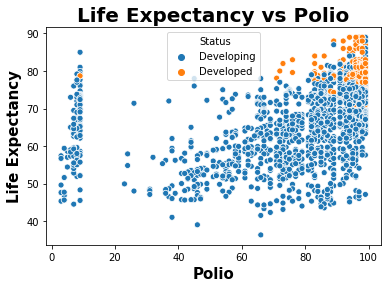

In [115]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Polio'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Polio', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Polio",  fontsize = 20,fontweight='bold')

In [62]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Polio'])

0.0565959107951891

In [63]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['Polio'])

0.36793894540098265

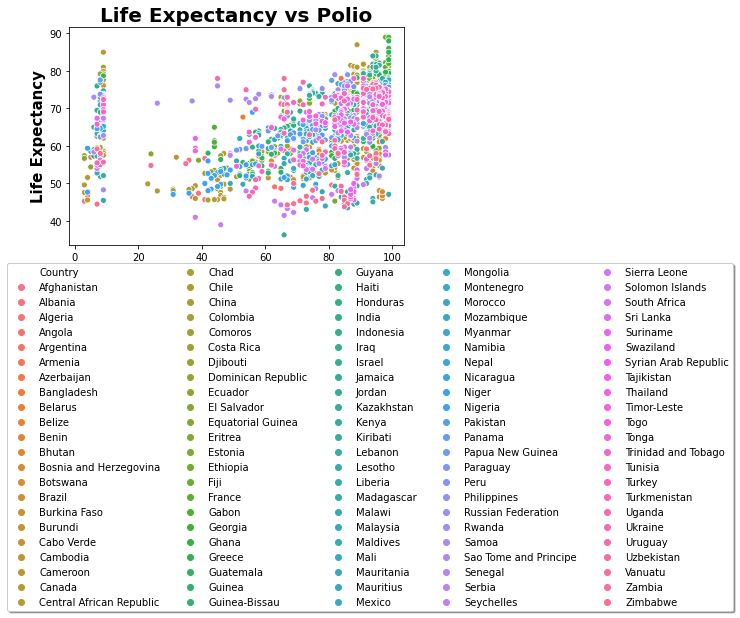

In [114]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Polio'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Polio', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Polio",  fontsize = 20,fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [65]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Diphtheria'])

0.4429428180370365

Text(0.5, 1.0, 'Life Expectancy vs Diphtheria')

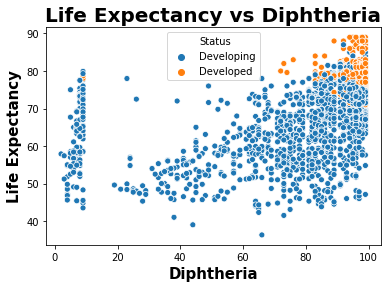

In [113]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Diphtheria'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Diphtheria', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Diphtheria",  fontsize = 20,fontweight='bold')

In [67]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Diphtheria'])

0.009468172953655329

In [68]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['Diphtheria'])

0.4023658471971515

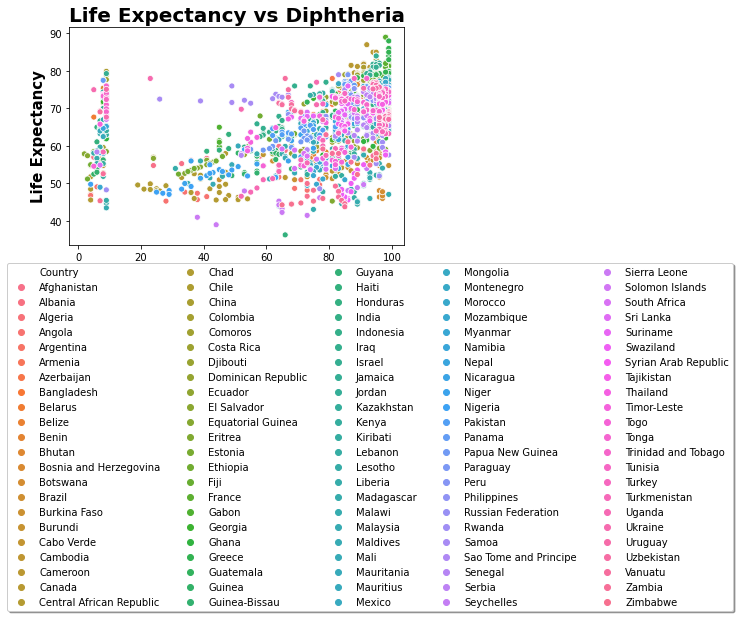

In [112]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Diphtheria'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Polio', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Diphtheria",  fontsize = 20,fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

### Economic Factor

In [70]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Percentage_Exp'])

0.4136829044198716

Text(0.5, 1.0, 'Life Expectancy vs Percentage Expenditure')

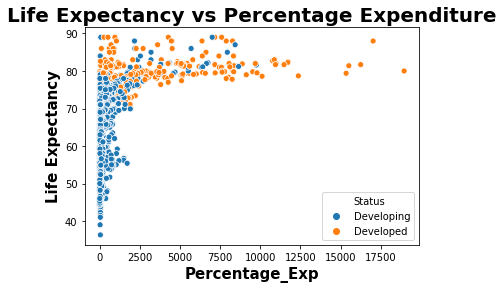

In [111]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Percentage_Exp'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Percentage_Exp', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Percentage Expenditure",  fontsize = 20,fontweight='bold')

In [72]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Percentage_Exp'])

0.3866096134670027

In [75]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Tot_Exp'])

0.19928758171917924

Text(0.5, 1.0, 'Life Expectancy vs Total Expenditure')

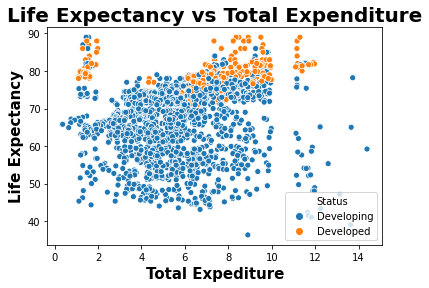

In [110]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Tot_Exp'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Total Expediture', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Total Expenditure",  fontsize = 20,fontweight='bold')

In [77]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Tot_Exp'])

0.17348025621152915

In [78]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['Tot_Exp'])

0.1117618717016007

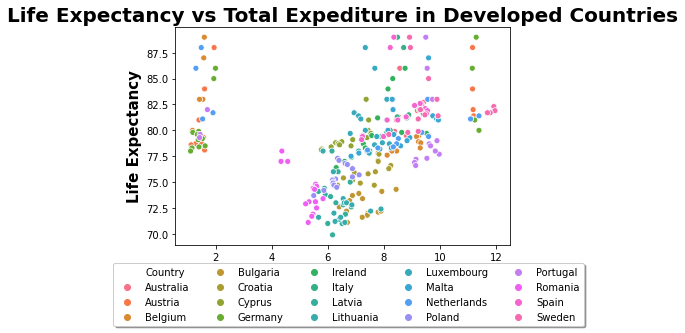

In [109]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelped, y = lifeExpecDevelped['Life_Expectancy'], x = lifeExpecDevelped['Tot_Exp'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Total Expediture', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Total Expediture in Developed Countries",  fontsize = 20,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [88]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['GDP'])

0.44361223595217136

Text(0.5, 1.0, 'Life Expectancy vs GDP')

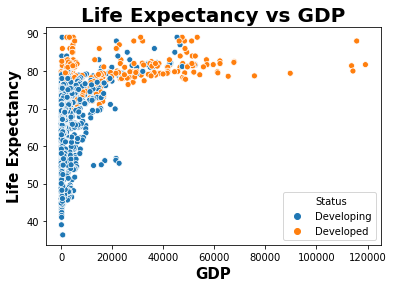

In [108]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['GDP'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('GDP', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs GDP",  fontsize = 20,fontweight='bold')

In [90]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['GDP'])

0.3830301438667266

In [91]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['GDP'])

0.4024196300744964

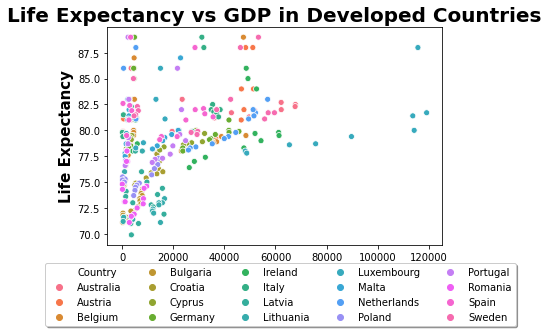

In [107]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelped, y = lifeExpecDevelped['Life_Expectancy'], x = lifeExpecDevelped['GDP'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('GDP', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs GDP in Developed Countries",  fontsize = 20,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

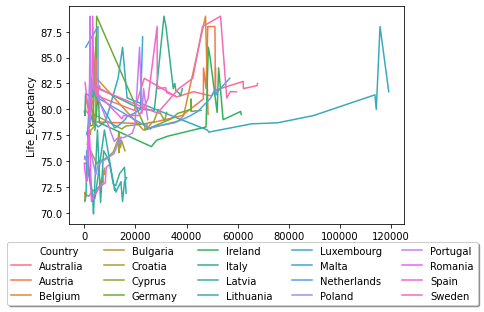

In [106]:
sns.lineplot(data=lifeExpecDevelped, y="Life_Expectancy", x ="GDP", hue="Country")
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

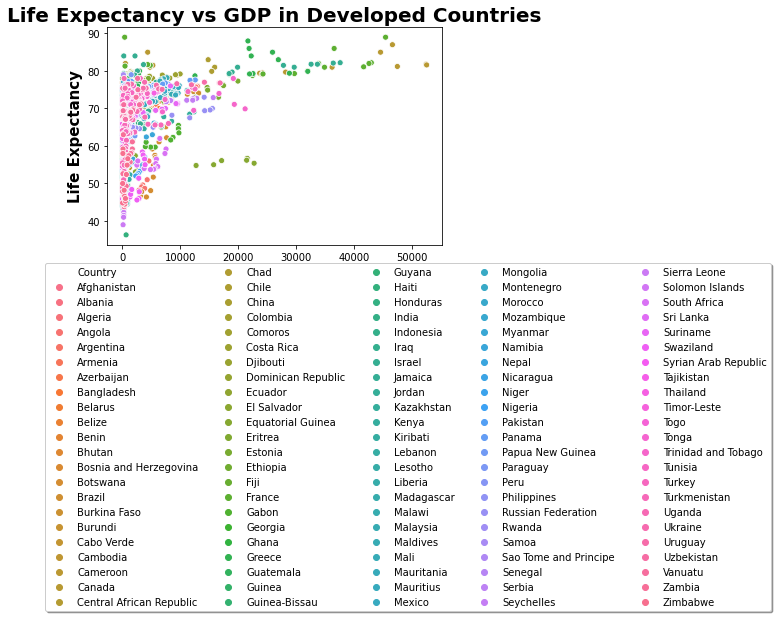

In [105]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x= lifeExpecDevelping['GDP'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('GDP', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs GDP in Developing Countries",  fontsize = 20,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [96]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Income_Comp_Of_Resources'])

0.7267525215461336

Text(0.5, 1.0, 'Life Expectancy vs Income Composition of Resources')

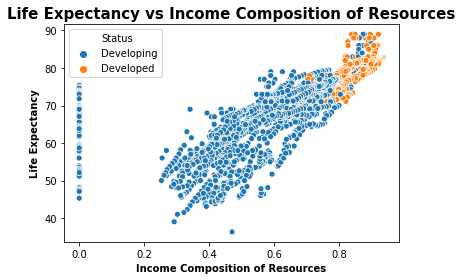

In [104]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y= lifeExpec['Life_Expectancy'],x = lifeExpec['Income_Comp_Of_Resources'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 10,fontweight='bold')
plt.xlabel('Income Composition of Resources', fontsize = 10,fontweight='bold')
ax.set_title("Life Expectancy vs Income Composition of Resources",  fontsize = 15,fontweight='bold')

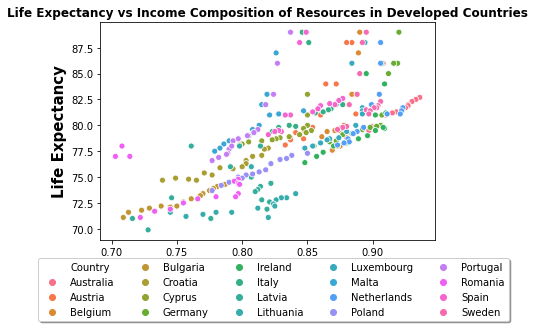

In [122]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelped, y = lifeExpecDevelped['Life_Expectancy'], x = lifeExpecDevelped['Income_Comp_Of_Resources'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Income Composition of Resources', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Income Composition of Resources in Developed Countries",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

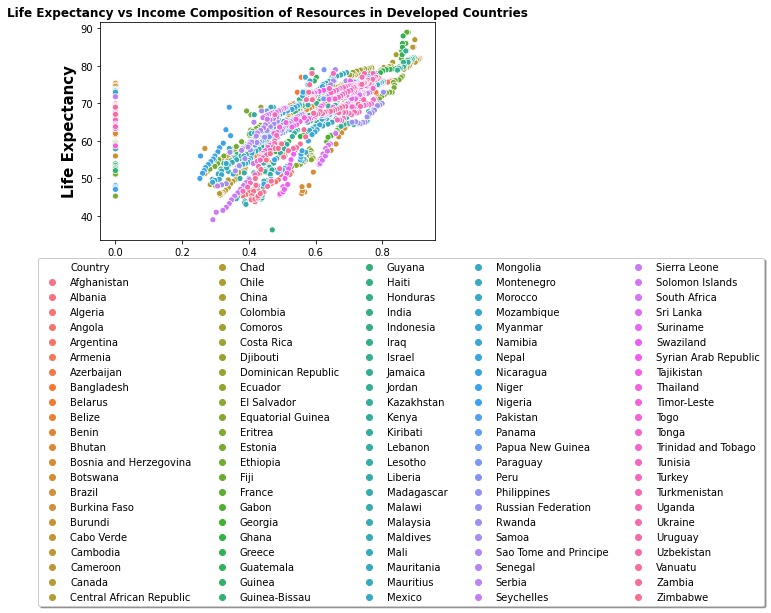

In [125]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Income_Comp_Of_Resources'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Income Composition of Resources', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Income Composition of Resources in Developed Countries",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [126]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Income_Comp_Of_Resources'])

0.7167148189576135

In [127]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['Income_Comp_Of_Resources'])

0.6525689734828017

In [128]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Schooling'])

0.7447031556346961

Text(0.5, 1.0, 'Life Expectancy vs Schooling')

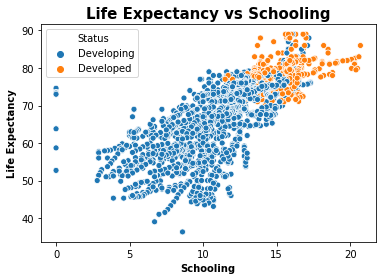

In [129]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y= lifeExpec['Life_Expectancy'],x = lifeExpec['Schooling'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 10,fontweight='bold')
plt.xlabel('Schooling', fontsize = 10,fontweight='bold')
ax.set_title("Life Expectancy vs Schooling",  fontsize = 15,fontweight='bold')

In [130]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Schooling'])

0.3695901390593522

In [131]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['Schooling'])

0.6839496917556541

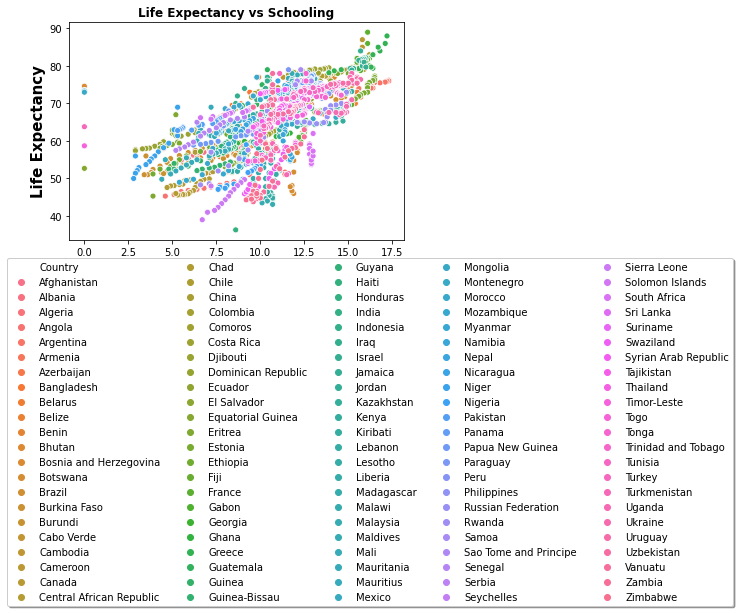

In [132]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Schooling'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Schooling', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Schooling",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

### Other Health Related Factors
- Alcohol
- BMI
- thinness_1to19_years
- thinness_5to9_years

In [136]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['Alcohol'])

0.3926166808979067

Text(0.5, 1.0, 'Life Expectancy vs Alcohol')

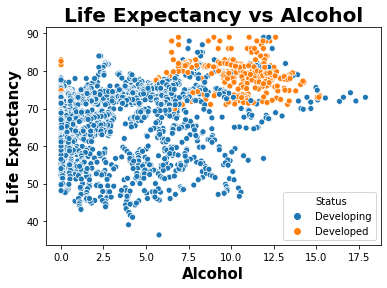

In [140]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['Alcohol'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Alcohol', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Alcohol",  fontsize = 20,fontweight='bold')

In [137]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['Alcohol'])

-0.14987625753886877

In [138]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['Alcohol'])

0.17992056348510224

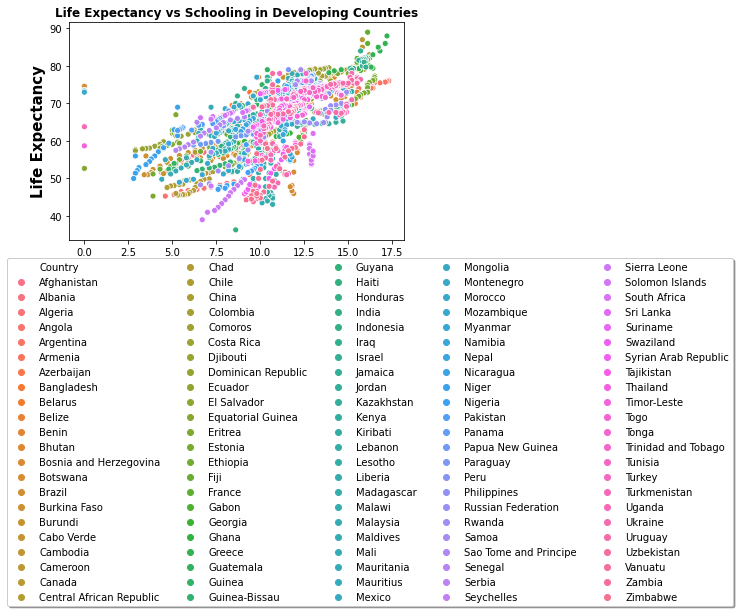

In [144]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['Schooling'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Schooling', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Schooling in Developing Countries",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

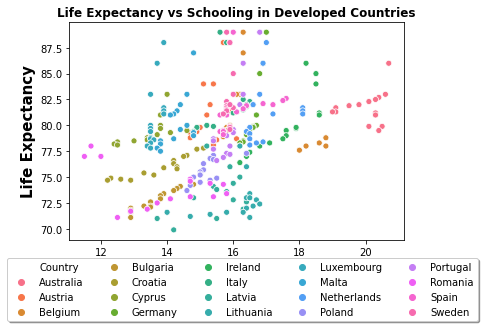

In [143]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelped, y = lifeExpecDevelped['Life_Expectancy'], x = lifeExpecDevelped['Schooling'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Schooling', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Schooling in Developed Countries",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [145]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['BMI'])

0.5995720043385722

Text(0.5, 1.0, 'Life Expectancy vs BMI')

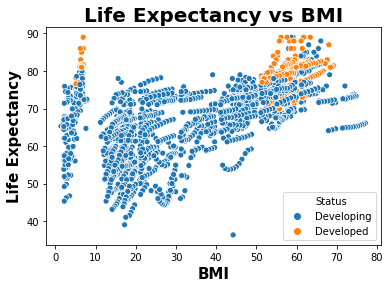

In [146]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['BMI'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('BMI', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs BMI",  fontsize = 20,fontweight='bold')

In [148]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['BMI'])

0.5711964313754454

In [149]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['BMI'])

0.019308769497729382

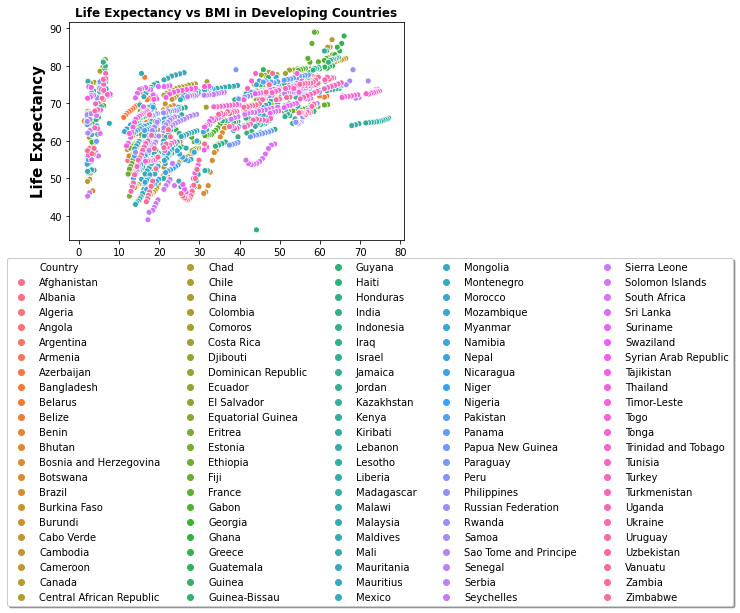

In [150]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelping, y = lifeExpecDevelping['Life_Expectancy'], x = lifeExpecDevelping['BMI'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('BMI', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs BMI in Developing Countries",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [154]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['thinness_1to19_years'])

-0.45872443832706694

Text(0.5, 1.0, 'Life Expectancy vs thinness_1to19_years')

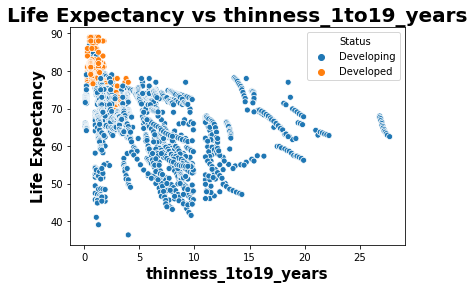

In [155]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['thinness_1to19_years'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('thinness_1to19_years', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs thinness_1to19_years",  fontsize = 20,fontweight='bold')

In [156]:
lifeExpecDevelped['Life_Expectancy'].corr(lifeExpecDevelped['thinness_1to19_years'])

-0.6839409033561171

In [158]:
lifeExpecDevelping['Life_Expectancy'].corr(lifeExpecDevelping['thinness_1to19_years'])

-0.3675580960493757

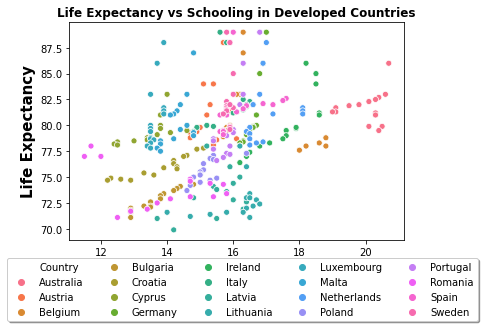

In [161]:
ax = plt.axes()
sns.scatterplot(data = lifeExpecDevelped, y = lifeExpecDevelped['Life_Expectancy'], x = lifeExpecDevelped['Schooling'],hue = "Country")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('Schooling', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs Schooling in Developed Countries",  fontsize = 12,fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.06),fancybox=True, shadow=True, ncol=5)

In [162]:
lifeExpec['Life_Expectancy'].corr(lifeExpec['thinness_5to9_years'])

-0.45009456318176766

Text(0.5, 1.0, 'Life Expectancy vs thinness_5to9_years')

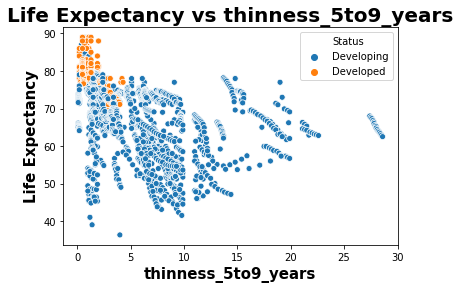

In [165]:
ax = plt.axes()
sns.scatterplot(data = lifeExpec, y = lifeExpec['Life_Expectancy'], x = lifeExpec['thinness_5to9_years'],hue = "Status")
plt.ylabel('Life Expectancy', fontsize = 15,fontweight='bold')
plt.xlabel('thinness_5to9_years', fontsize = 15,fontweight='bold')
ax.set_title("Life Expectancy vs thinness_5to9_years",  fontsize = 20,fontweight='bold')

In [60]:
##model = ols("Life Expectancy ~ Adult_Mortality + Infant_Deaths", data=lifeExpec).fit()
##print (model.params)
##print (model.summary()

In [61]:
lifeExpec.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [24]:
## normalize data
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(lifeDropYearCountry )

In [30]:
len(data_scaled)

1987